In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("marshuu/breast-cancer")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████| 3.37k/3.37k [00:00<00:00, 1.48MB/s]

Extracting files...
Path to dataset files: C:\Users\Aksha\.cache\kagglehub\datasets\marshuu\breast-cancer\versions\2


In [3]:
file_path = os.path.join(path, "breast_cancer.csv")

In [4]:
df = pd.read_csv(file_path)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [5]:
print(df.columns)

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In [7]:
features = ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']
X = df[features]
y = df['Class']

In [12]:
log_reg = LogisticRegression(random_state = 16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16)

In [13]:
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,16
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
y_pred = log_reg.predict(X_test)

In [16]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[112,   5],
       [  2,  52]])

Text(0.5, 427.9555555555555, 'Predicted label')

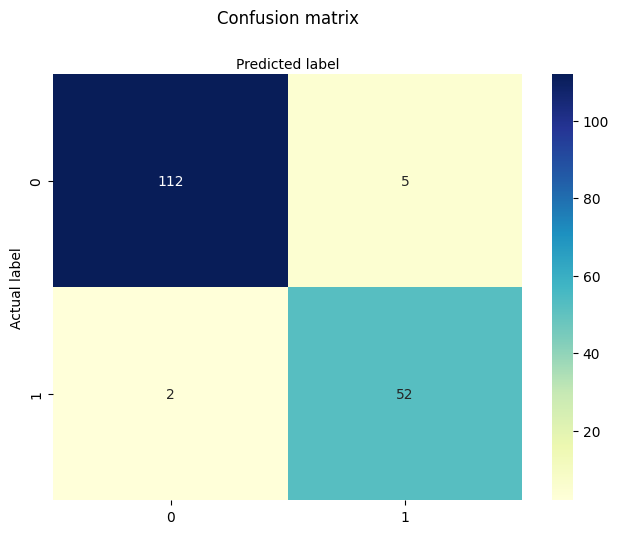

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

